# Summary

This dataset has been taken from kaggle for supervised learning - classification purpose. This dataset is based on stellar classification which is the classification of star based on their spectral charateristics.

This stellar classification dataset consist of 100000 observations(rows) of space taken by SDSS (Sloan Digital Sky Survey). Every observation is described by 17 features (columns). Besides, there is one "class" column which differenciate between stars, galaxy or quasar depending on those observations.

In [1]:
#importing necessary libraries 

import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
%matplotlib inline

In [2]:
#mute some of the warning of ipython and sklearn
import warnings
warnings.filterwarnings('ignore', module = 'sklearn')
warnings.filterwarnings ('ignore', module = 'Ipython')

In [3]:
file = 'star_classification.csv'
data = pd.read_csv (file, sep = ',')
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


# Feature Analysis 

The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

<b>obj_ID</b> = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

<b>alpha</b> = Right Ascension angle (at J2000 epoch)

<b>delta</b> = Declination angle (at J2000 epoch)

<b>u</b> = Ultraviolet filter in the photometric system

<b>g</b> = Green filter in the photometric system

<b>r</b> = Red filter in the photometric system

<b>i</b> = Near Infrared filter in the photometric system

<b>z</b> = Infrared filter in the photometric system

<b>run_ID</b> = Run Number used to identify the specific scan

<b>rereun_ID</b> = Rerun Number to specify how the image was processed

<b>cam_col</b> = Camera column to identify the scanline within the run

<b>field_ID</b> = Field number to identify each field

<b>spec_obj_ID</b> = Unique ID used for optical spectroscopic objects (this means that 2 different observations with                        the same spec_obj_ID must share the output class)

<b>class</b> = object class (galaxy, star or quasar object)

<b>redshift</b> = redshift value based on the increase in wavelength

<b>plate</b> = plate ID, identifies each plate in SDSS

<b>MJD</b> = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

<b>fiber_ID</b> = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


In [4]:
#Checking data types of all the features

data.dtypes.value_counts()

float64    10
int64       7
object      1
dtype: int64

In [5]:
data.shape

(100000, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

We can cleary see that all the data are either float or int except for our target variable, which we will LabelEncode later.

Data set is pretty good with no null values

In [7]:
pd.DataFrame([[i, len(data[i].unique())] for i in data.columns],
            columns = ['Variables', 'Unique_values']).set_index('Variables')

,Unique_values
Variables,
obj_ID,78053
alpha,99999
delta,99999
u,93748
g,92651
r,91901
i,92019
z,92007
run_ID,430


In [8]:
data['class'].value_counts()

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

As one can notice, our Target variable 'class' is pretty imbalance. First of all, we will remove 'QSO' class from our variable to make is binary classification.

In [9]:
#removing class QSO from target variable 

Qso_index = data[data['class'] == 'QSO'].index
data = data.drop(Qso_index, axis = 0).reset_index(drop=True)

In [10]:
#converting our binary classfication variable to integer 
data['class'] = (data['class'] == 'GALAXY').astype(int)

In [11]:
data['class'].value_counts()

1    59445
0    21594
Name: class, dtype: int64

# Splitting data

In [12]:

feature_columns = [i for i in data.columns if i != 'class']
feature_columns


['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'rerun_ID',
 'cam_col',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID']

In [13]:
strat_shuff_split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 42)

train_index, test_index = next(strat_shuff_split.split(data[feature_columns], data['class']))

X_train = data.loc[train_index, feature_columns]
y_train = data.loc[train_index, 'class']

X_test = data.loc[test_index, feature_columns]
y_test = data.loc[test_index, 'class']

As one can we, we got almost every observation unique for some of the feature, they are very likely not to contribute to our model, we will use violin graph to check visually how much they contribute to the target variable.

In [14]:
#combing features and target variable of train set in dataframe 
#combing features and target variable of test set in dataframe 

data_train = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis = 1)


In [15]:
def plot_violin(x, y):
    fig = plt.figure(figsize=(10, 7))
    sns.violinplot(x=x, y=y)
    plt.show()
    return

<b>obj_ID</b> 

* Object Identifier, the unique value that identifies the object in the image catalog used by the CAS

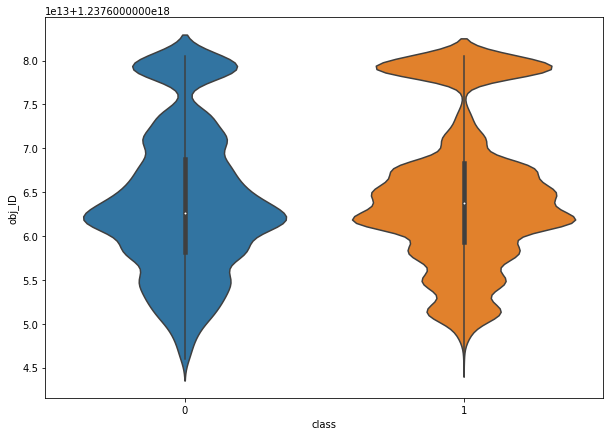

In [16]:
plot_violin(x = data_train['class'], y = data['obj_ID'])


* From the violin plot it can be said that, value of obj_ID doesn't contribute in classifying Star or Galaxy.
* This feature will be removed.


<b>alpha</b>

* Feature alpha gives the right ascension angle from the measured point.


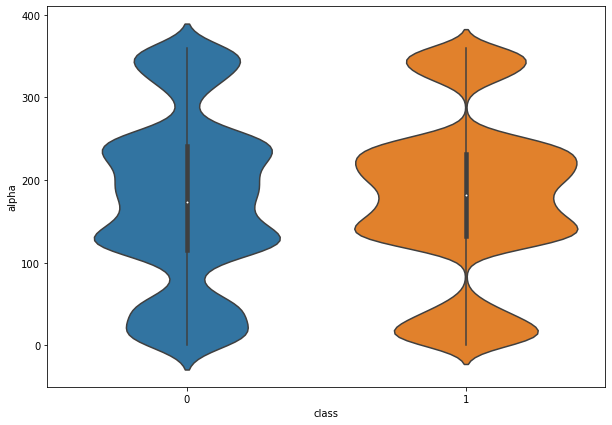

In [17]:
plot_violin(x = data_train['class'], y = data_train['alpha'])

* From the violin plot it can be concluded that values of alpha doesn't contribute in classifying Star and Galaxy.
* So, classification of star and galaxy doesn't depend on the right ascention angle.

<b>delta</b>

* Feature delta gives the declination angle from the measured point.
* Since it is an angle it will range between 0-360.

In [18]:
#checking for negative values as angles can not be negative 
indicess = data_train[data_train['delta']< 0].index
data_train.drop(indicess, inplace = True)

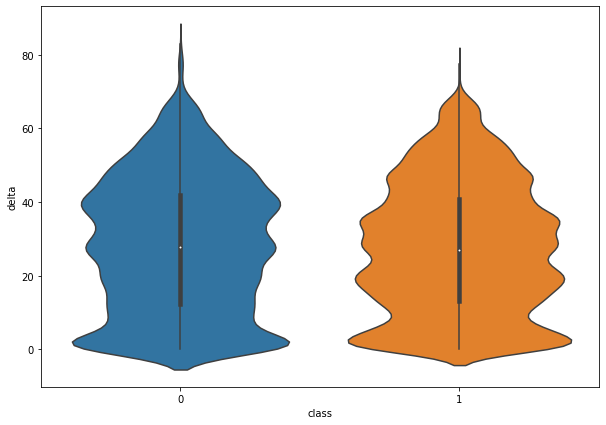

In [19]:
plot_violin(x = data_train['class'], y = data_train['delta'])


* From the violin plot it can be concluded that values of delta doesn't contribute in classifying Star and Galaxy.
* So, classification of star and galaxy doesn't depend on the declination angle.

<b>u</b>

* Feature 'u' is Ultraviolet filter in the photometric system.


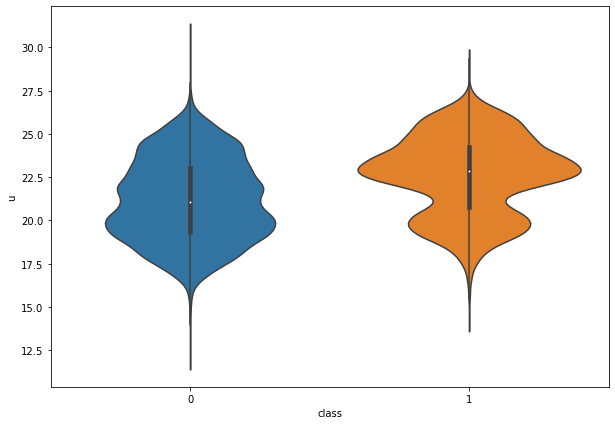

In [20]:
plot_violin(x = data_train['class'], y = data_train['u'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-21 of feature 'u'.
* And, majority of Galaxies can be found in the range 21-28 of feature 'u'.

<b>g</b>

* Feature 'g' is Green filter in the photometric system.

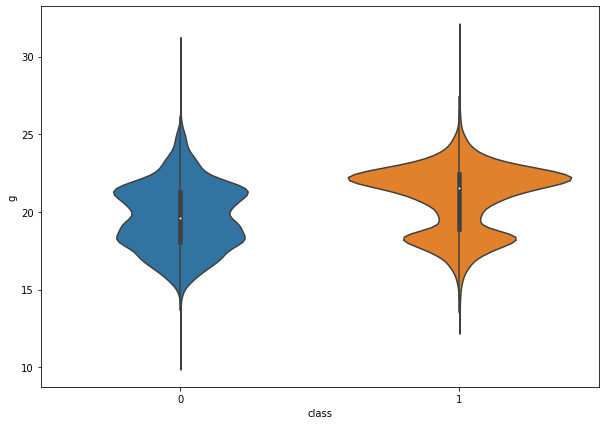

In [21]:
plot_violin(x = data_train['class'], y = data_train['g'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-20 of 'g'.
* And, majority of Galaxies can be found in the range 20-25 of feature 'g'.

<b>r</b>

* Feature 'r' is Red filter in the photometric system.

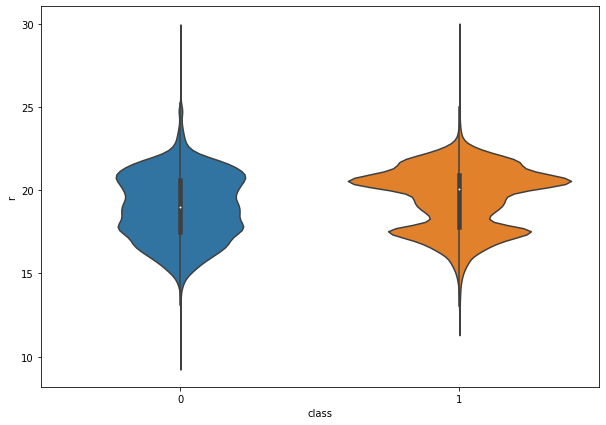

In [22]:
plot_violin(x = data_train['class'], y = data_train['r'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-18 of 'r'.
* And, majority of Galaxies can be found in the range 18-25 of feature 'r'.

<b>i</b>

Feature 'i' is Near Infrared filter in the photometric system

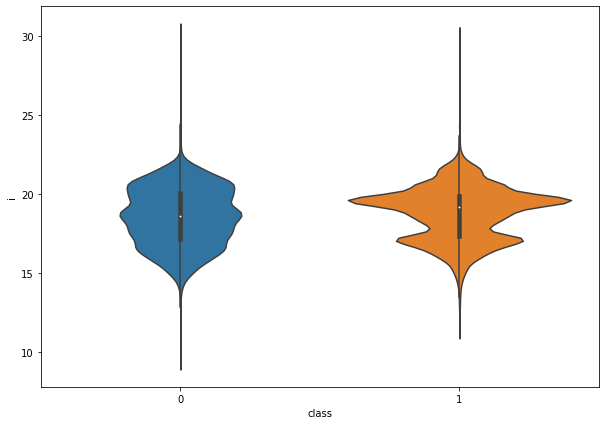

In [23]:
plot_violin(x = data_train['class'], y = data_train['i'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-18 of 'i'.
* And, majority of Galaxies can be found in the range 18-22 of feature 'i'.

<b>z</b>

* Feature 'z' is Infrared filter in the photometric system.

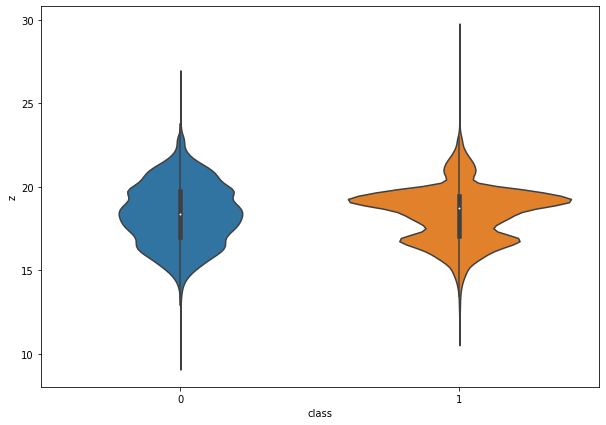

In [24]:
plot_violin(x = data_train['class'], y = data_train['z'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-17 of 'z'.
* And, majority of Galaxies can be found in the range 17-22 of feature 'z'.
* Since features 'u', 'g', 'r', 'i', and 'z' have similar violin plots, They all have strong correlation with each other.

<b>run_ID</b>

* Feature 'run_ID' is Run Number used to identify the specific scan.

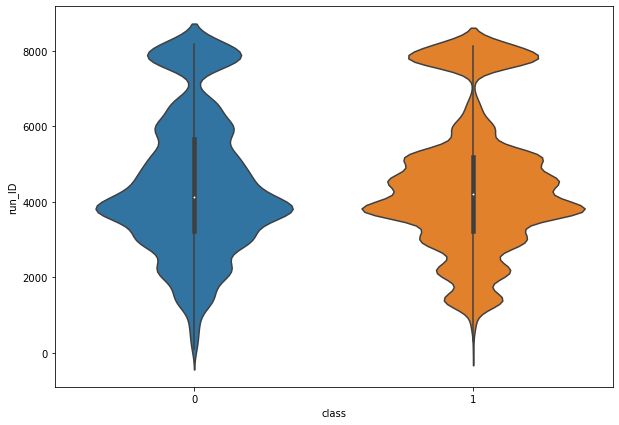

In [25]:
plot_violin(x = data_train['class'], y = data_train['run_ID'])

* From the violin plot, it can be concluded that, the value of feature 'run_ID' doesn't affect the classification of   Star and Galaxy.
* It is a number which is unique for all observations.
* I will remove this feature.

<b>rerun_ID</b>

* Feature 'rerun_ID' is Rerun Number to specify how the image was processed

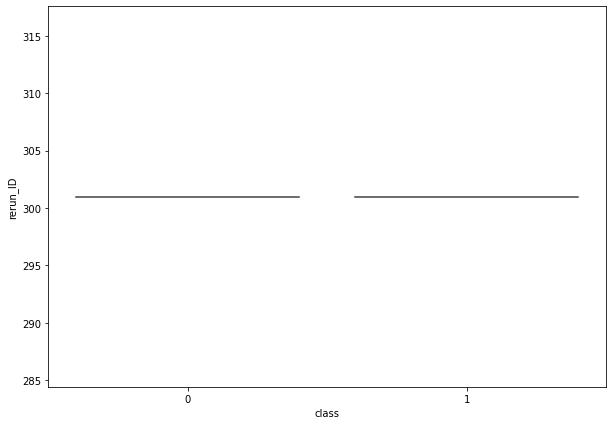

In [26]:
plot_violin(x = data_train['class'], y = data_train['rerun_ID'])

In [27]:
data['rerun_ID'].value_counts()

301    81039
Name: rerun_ID, dtype: int64

* The value of 'rerun_ID' is same for all the observations.
* This feature doesn't give any information. So, I will remove it

<b>cam_cool</b>

Feature 'cam_col' is Camera column to identify the scanline within the run.

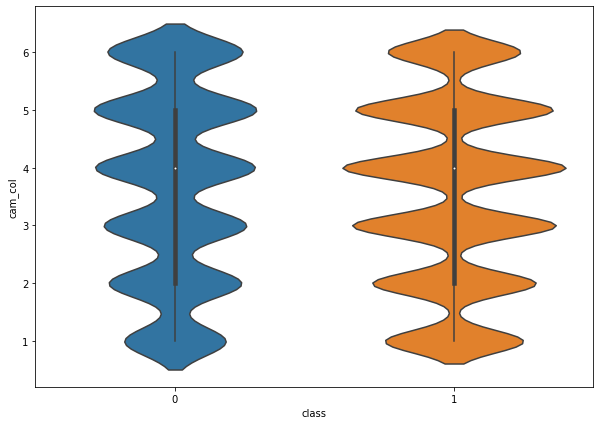

In [28]:
plot_violin(x = data_train['class'], y = data_train['cam_col'])

* As one can see it features cluster of each class at same values.
* This feature will not help identifying the class. Hence, we will remove it

<b>field_ID</b>

* Feature 'field_ID' is Field number to identify each field.

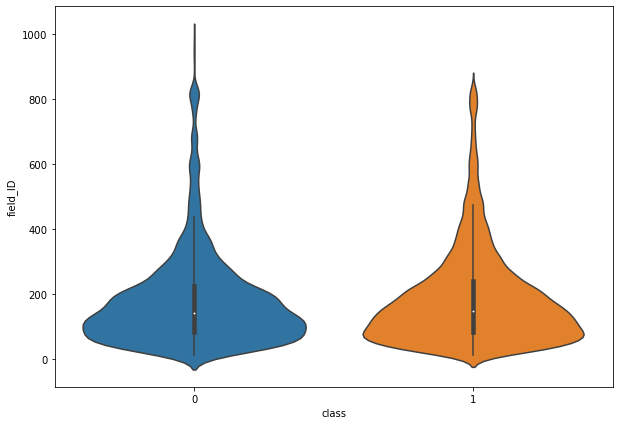

In [29]:
plot_violin(x = data_train['class'], y = data_train['field_ID'])

* we will remove this feature as well as it does not adds value to identifying true class

<b>spec_obj_ID</b>

* Feature 'spec_obj_ID' is Unique ID used for optical spectroscopic objects.

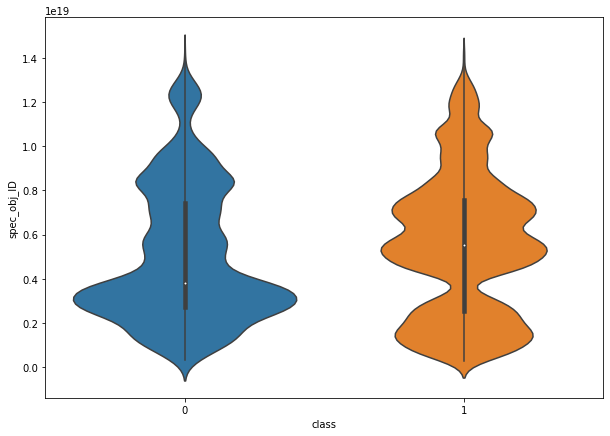

In [30]:
plot_violin(x = data_train['class'], y = data_train['spec_obj_ID'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-0.5 of 'spec_obj_ID'.
* And, majority of Galaxies can be found in the range 0.5-1.4 of feature 'spec_obj_ID'.

<b>redshift</b>

* Feature 'redshift' is redshift value based on the increase in wavelength.


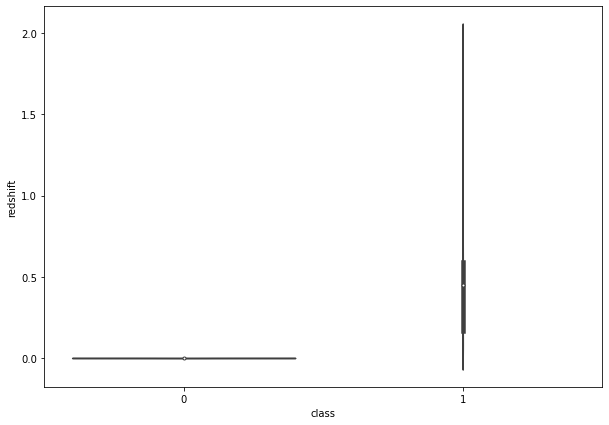

In [31]:
plot_violin(x = data_train['class'], y = data_train['redshift'])

In [32]:
data[data['redshift'] < 0]['class'].value_counts()

0    13682
1       42
Name: class, dtype: int64

In [33]:
data[data['redshift'] > 0]['class'].value_counts()

1    58991
0     7912
Name: class, dtype: int64

* As we can see for negative value of reshift, we are getting class 'stars' most of the time
* Postive value of redshift indicates class 'galaxy' most of the time

<b>plate</b>

* Feature 'plate' is plate ID, identifies each plate in SDSS.

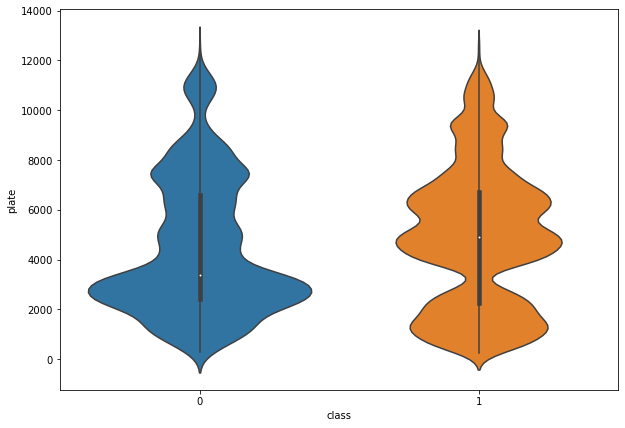

In [34]:
plot_violin(x = data_train['class'], y = data_train['plate'])

* From the violin plot, it can be concluded that, majority of Stars can be found in the range 0-4000 of 'plate'.
* And, majority of Galaxies can be found in the range 4000-9000 of feature 'plate'.

<b>MJD</b>

* Feature 'MJD' is Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* Since feature 'MJD' is a form of Date, it shouldn't be used for modeling.
* Because observation of Star and Galaxy can be taken any day. So, there can't be any relationship. So, I will remove this feature.

<b>fiber_ID</b>

* Feature 'fiber_ID' is fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

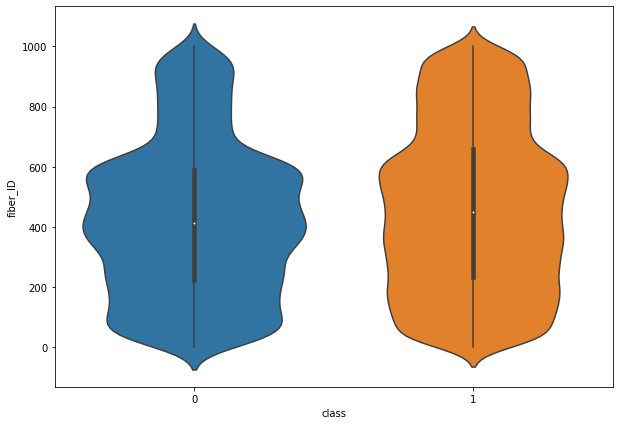

In [35]:
plot_violin(x = data_train['class'], y = data_train['fiber_ID'])

* As seen from the graph that it does not adds value to our model.
* Hence, it will removed 

In [36]:
# Features to be removed
rem_features = ["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "MJD", "fiber_ID"]

In [37]:
#removing these features in our data

data_train.drop(rem_features, axis = 1, inplace = True)
data_test.drop(rem_features, axis = 1, inplace = True)

In [38]:
print(data_train.shape)
print(data_test.shape)


(49508, 11)
(24312, 11)


# Checking Correlation

<AxesSubplot:>

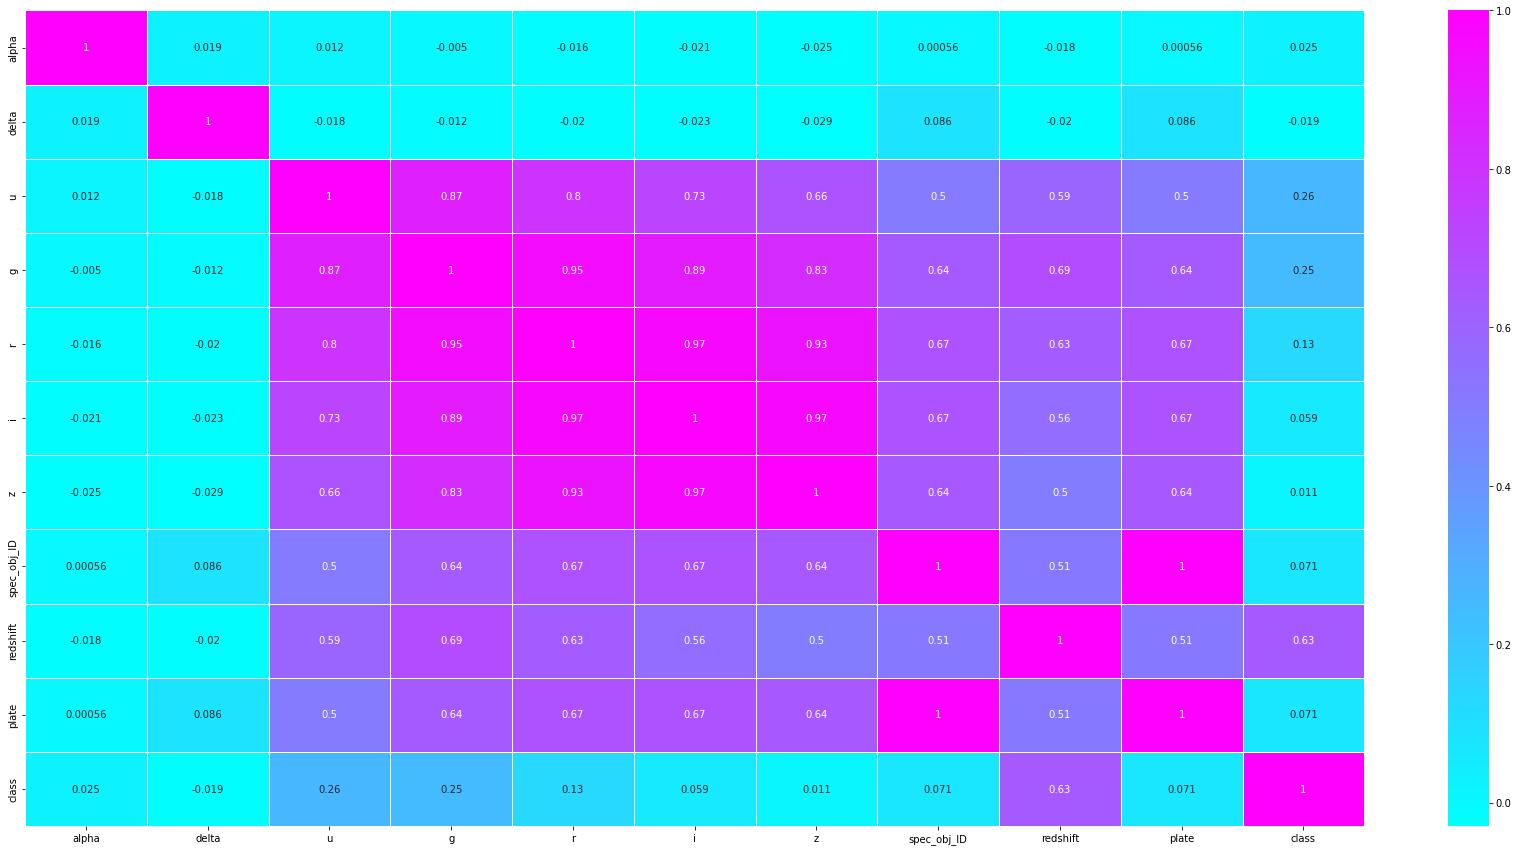

In [39]:
plt.figure(figsize = (30, 15))
sns.heatmap(data_train.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

* Muticollinearity exists between features - ('u' and 'g'), ('g', 'r', 'i'), ('z', 'g', 'r', 'i'), ('spec_obj_ID' and 'plate')
* I will remove features - 'g', 'r', 'i', 'spec_obj_ID'.

In [40]:
# Removing correlated features.
data_train.drop(["g", "r", "i", "spec_obj_ID"], axis=1, inplace=True)
data_test.drop(["g", "r", "i", "spec_obj_ID"], axis=1, inplace=True)

<AxesSubplot:>

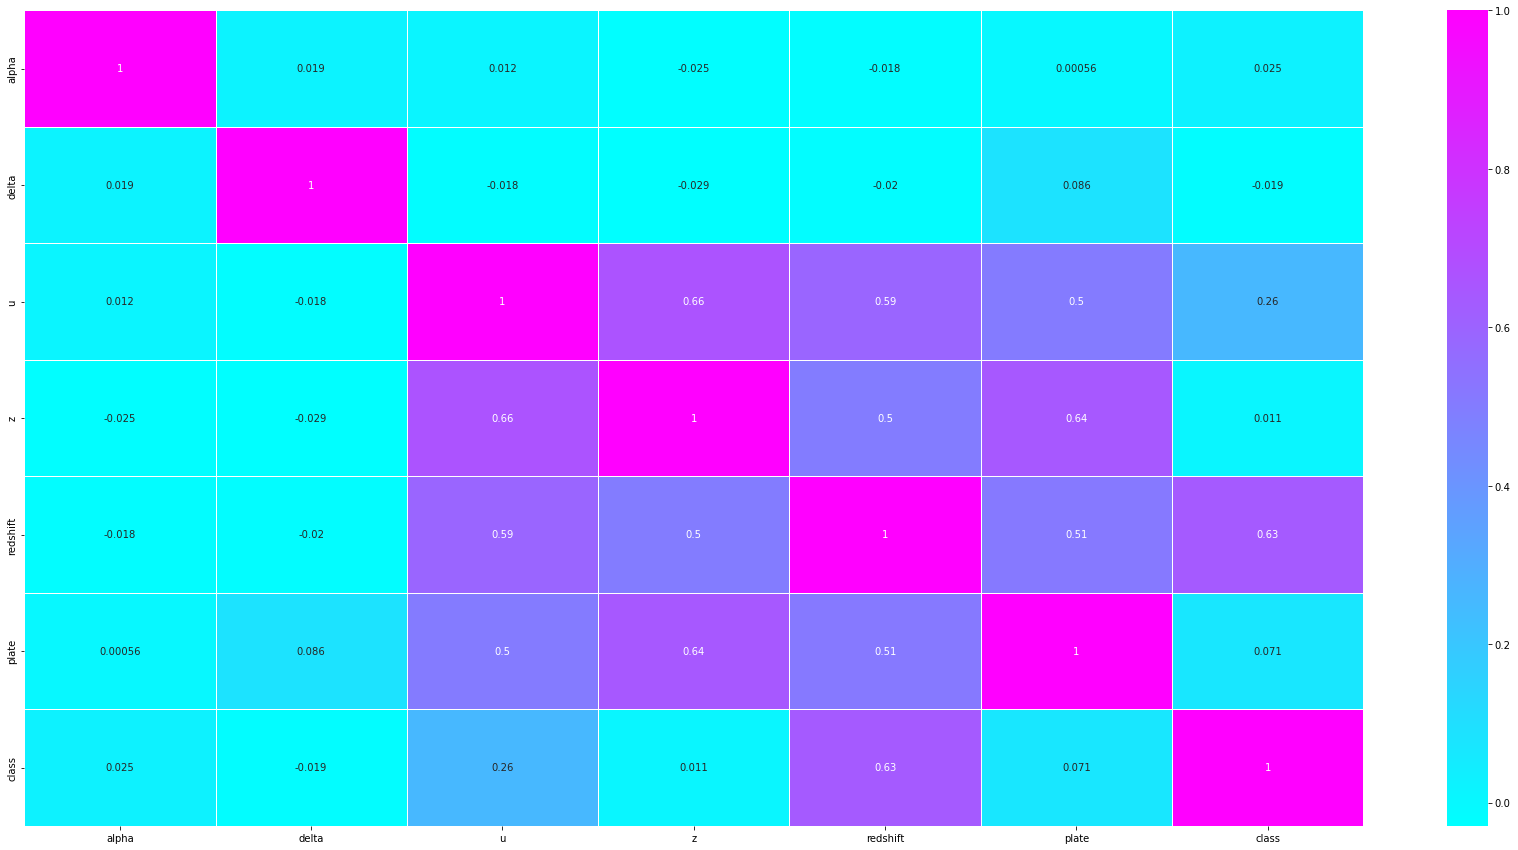

In [41]:
#After dropping those correlated columns

plt.figure(figsize = (30, 15))
sns.heatmap(data_train.corr(), annot = True, linewidths=.5, cmap = plt.cm.cool)

# Scaling the features 

In [42]:
feature_cols = [i for i in data_train.columns if i != 'class']
feature_cols

['alpha', 'delta', 'u', 'z', 'redshift', 'plate']

In [43]:
mm = MinMaxScaler()

data_train[feature_cols] = mm.fit_transform(data_train[feature_cols])
data_test[feature_cols]= mm.transform(data_test[feature_cols])
data_train.describe().T


,count,mean,std,min,25%,50%,75%,max
alpha,49508.0,0.516073,0.246307,0.0,0.373822,0.519451,0.654265,1.0
delta,49508.0,0.332391,0.215110,0.0,0.154843,0.328788,0.496513,1.0
u,49508.0,0.545094,0.128540,0.0,0.437706,0.561107,0.640105,1.0
z,49508.0,0.444182,0.085437,0.0,0.376170,0.456931,0.499487,1.0
redshift,49508.0,0.156897,0.144235,0.0,0.003833,0.129548,0.272581,1.0
plate,49508.0,0.367455,0.226070,0.0,0.169367,0.360516,0.523003,1.0
class,49508.0,0.737295,0.440108,0.0,0.000000,1.000000,1.000000,1.0


# Classification Models 


* logistic regression, K-nearest neighbors algorithm, Decision Tree,mRandom Forest
* plotting confusion matrix
* analysing precision, recall, accuracy, F1 score, auc

# Logistic Regression

In [44]:
#creating metrics data frane

metrics = pd.DataFrame()

#Standard Logistic Regression

lr = LogisticRegression (solver = 'liblinear')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

precision_lr, recall_lr = (round(float(x), 2) for x in list (score(y_test, y_pred_lr, average = 'weighted'))[:2])

accuracy =round( accuracy_score (y_test, y_pred_lr),2)

#lr_metrics later to be added on metrics data frame

lr_metrics = pd.Series({'precision': precision_lr,
                        'recall' : recall_lr,
                       'accuracy': accuracy,
                        'f1': round(f1_score(y_test, y_pred_lr),2),
                        'auc':round(roc_auc_score(y_test, y_pred_lr),2)},
                        name = 'Logistic_Regression')


#classification report data frame

pd.DataFrame(classification_report(y_test, y_pred_lr, output_dict =True )).iloc[:3,:2]




,0,1
precision,0.0,0.733547
recall,0.0,1.000000
f1-score,0.0,0.846296


# K-Nearest Neighbors


In [45]:
#using KNN training model 

knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


#precision and recall
precision_knn, recall_knn = (round(float(x),2) for x in list(score(y_test, y_pred_knn, average = 'weighted'))[:2])

#knn_mertrics later to be added on metrics data frame
knn_metrics = pd.Series({'precision': precision_knn,
                         'recall': recall_knn,
                         'accuracy': round(accuracy_score(y_test, y_pred_knn),2),
                         'f1': round(f1_score(y_test, y_pred_knn),2),
                         'auc': round(roc_auc_score(y_test, y_pred_knn),2)},
                         name = 'K-Neartest Neighbors')

#classification report data frame
pd.DataFrame(classification_report(y_test, y_pred_knn, output_dict = True)).iloc[:3,:2]

,0,1
precision,0.645738,0.854462
recall,0.585829,0.883257
f1-score,0.614326,0.868621


# Decision Tree

In [46]:
#using Decision Tree training model 

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(X_train, y_train)
dt.tree_.node_count, dt.tree_.max_depth

(237, 18)

In [47]:
y_pred_dt = dt.predict(X_test)

#precision and recall
precision_dt, recall_dt = (round(float(x),2)for x in list(score(y_test, y_pred_dt, average = 'weighted'))[:2])

#dt_metrics later to be added on metrics dataframe
dt_metrics = pd.Series({'precision': precision_dt,
                        'recall': recall_dt,
                        'accuracy': round(accuracy_score(y_test, y_pred_dt),2),
                        'f1': round(f1_score(y_test, y_pred_dt),2),
                        'auc': round(roc_auc_score(y_test, y_pred_dt),2)},
                        name = 'Decision Tree')

#classification report data frame
pd.DataFrame(classification_report(y_test, y_pred_dt, output_dict = True)).iloc[:3, :2]

,0,1
precision,0.995215,0.998262
recall,0.995215,0.998262
f1-score,0.995215,0.998262


# Random Forest


In [48]:
#applyin random forest classifier 

RF = RandomForestClassifier(oob_score = True,
                           random_state = 42,
                           warm_start = True,
                           n_jobs = -1)

#creating list for out of bag error
oob_list = list()

#iterate through the list of trees and find the optimal one 

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    #using each one of the trees in rf parameter
    RF.set_params(n_estimators = n_trees)
    
    #fitting the mode
    RF.fit(X_train, y_train)
    
    #get the oob error and append it to it's list 
    oob_error = 1- RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob_error': oob_error}))
    
#creating the dataframe of oob_list
oob_error_df = pd.concat(oob_list, axis =1).T.set_index ('n_trees')

In [49]:
oob_error_df

,oob_error
n_trees,
15.0,0.005377
20.0,0.004495
30.0,0.003526
40.0,0.003420
50.0,0.002944
100.0,0.002697
150.0,0.002715
200.0,0.002768
300.0,0.002821


As we can observe, as the no. of tree increases, the error's going down and it gets stable at 100 trees. which will be our optimal value at this point


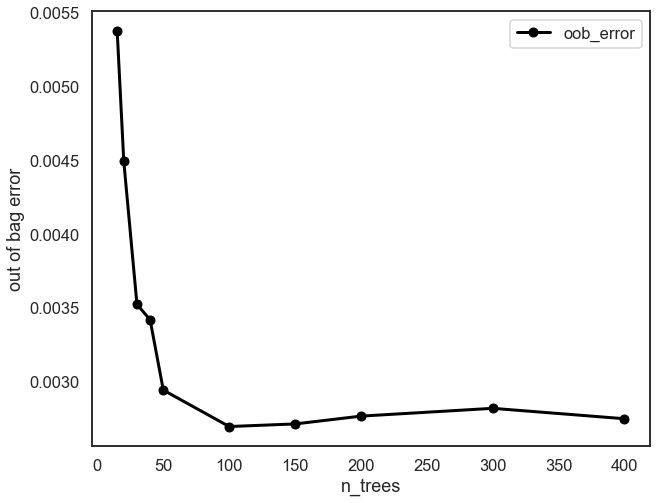

In [50]:
# plotting error_df 
sns.set_context('talk')
sns.set_style ('white')

ax = oob_error_df.plot(marker = 'o', color = 'black', figsize = (10,8), linewidth = 3)
ax.set(ylabel = 'out of bag error');

In [51]:
#let's use n_estimator = 100 for classifier

rf = RF.set_params(n_estimators = 100)
y_pred_rf = rf.predict(X_test)

#precision and recall 
precision_rf, recall_rf = (round(float(x),2) for x in list(score(y_test, y_pred_rf, average = 'weighted'))[:2])

#rf_metrics laters to be added on metrics data frame

rf_metrics = pd.Series ({'precision': precision_rf,
                         'recall': recall_rf,
                         'accuracy': round(accuracy_score(y_test, y_pred_rf),2),
                         'f1': round(f1_score(y_test, y_pred_rf),2),
                         'auc': round(roc_auc_score(y_test, y_pred_rf),2)},
                        name = 'Random Forest')

#classification report dataframe
pd.DataFrame(classification_report(y_test, y_pred_rf, output_dict = True)).iloc[:3, :2]


,0,1
precision,0.988244,0.999719
recall,0.999228,0.995682
f1-score,0.993706,0.997696


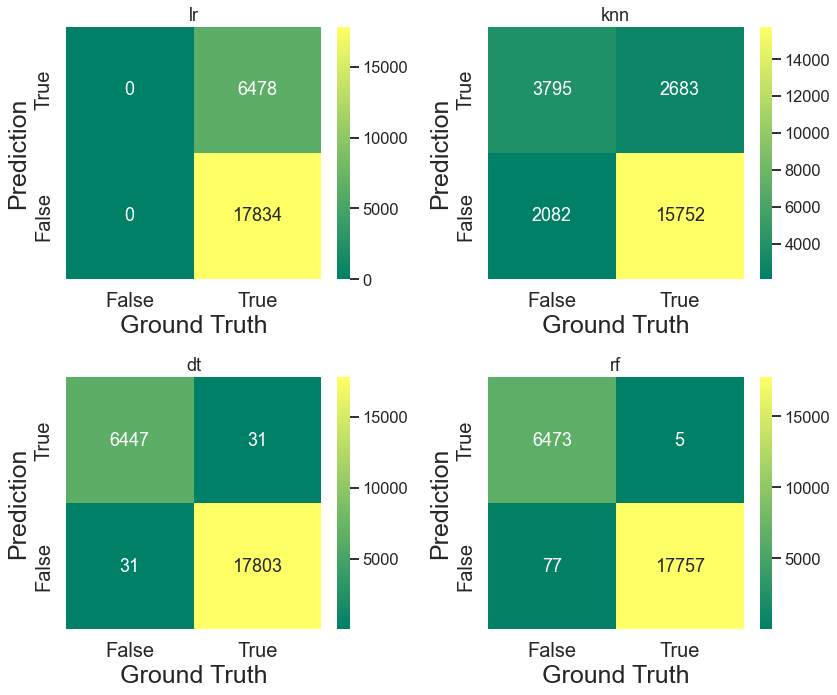

In [52]:
#analysing confusion matrix

fig, axList = plt.subplots(nrows = 2, ncols = 2)

axList = axList.flatten()
fig.set_size_inches (12,10)

models =  ['lr', 'knn', 'dt', 'rf']

cm = [confusion_matrix(y_test, y_pred_lr),
     confusion_matrix(y_test, y_pred_knn),
     confusion_matrix(y_test, y_pred_dt),
     confusion_matrix(y_test, y_pred_rf)]

labels = ['False', 'True']

for ax, model, idx in zip(axList, models, [0,1,2,3]):
    sns.heatmap(cm[idx], ax = ax, annot= True, fmt = 'd', cmap = 'summer')
    ax.set(title = model);
    ax.set_xticklabels(labels, fontsize = 20);
    ax.set_yticklabels(labels[::-1], fontsize = 20);
    ax.set_xlabel('Ground Truth', fontsize = 25);
    ax.set_ylabel('Prediction', fontsize = 25);
    
plt.tight_layout()
    


As it can seen from confusion matrix that our decision tree and random forest are performing fairly good compare to k neighbors and logistic regression

# Conclusion

In [55]:
metrics.append([lr_metrics, knn_metrics, dt_metrics, rf_metrics])

,precision,recall,accuracy,f1,auc
Logistic_Regression,0.54,0.73,0.73,0.85,0.50
K-Neartest Neighbors,0.80,0.80,0.80,0.87,0.73
Decision Tree,1.00,1.00,1.00,1.00,1.00
Random Forest,1.00,1.00,1.00,1.00,1.00


Metrics data frame shows that 'Decision Tree' and 'Random Forest' approach for our model works the best in this situation with almost perfect score 

# Next Steps

* We can use different upsampling and downsampling methods like SMOTE and tomek's link so that we can have equal no of classes values.
* we can even use other methods like random tree to increase more randomness
* we can use gridsearch cv to tune in the best hyper parameters for our model